In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# obsolete
%matplotlib inline


from sklearn import svm

# to generate synthetic clustered datasets
from sklearn.datasets import make_blobs

# Support Vector Machine (SVM)

## Example 1

We have set of points $X$ (independent) and label $y$ (depedent)

For a new point $X1 = (1, 3)$, does it belong to which $y$ label?

We will use SVM with linear kenerl to predict.

Prediction for point (1, 3): [0]


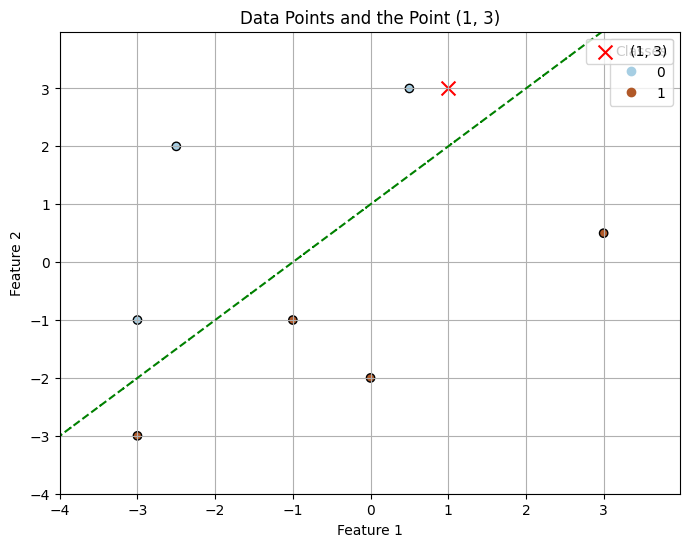

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# features
X = np.array([
    [-3, -1],
    [0, -2],
    [-2.5, 2],
    [-1, -1],
    [3, 0.5],
    [0.5, 3],
    [-3, -3],
])

# labels
y = np.array([0, 1, 0, 1, 1, 0, 1])

# fit
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# predict
new_point = np.array([[1, 3]])
prediction = clf.predict(new_point)
print(f"Prediction for point (1, 3): {prediction}")

# Plot the data points
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

# Plot the point (1, 3)
plt.scatter(new_point[:, 0], new_point[:, 1], c='red', marker='x', s=100, label='(1, 3)')

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Create a grid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors=['green'], linestyles=['--'], levels=[0])

# Add legend for the classes
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Add legend for the new point
plt.legend(loc='upper right')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and the Point (1, 3)')
plt.grid(True)
plt.show()

## Example 2

`clf = svm.SVC(kernel='linear', C=1.0)`

- `kernel`: linear, rbf, poly, sigmoid
- `C`: Regularization parameter. It controls the trade-off between achieving a low training error and having a large margin.
 - `Margin`:

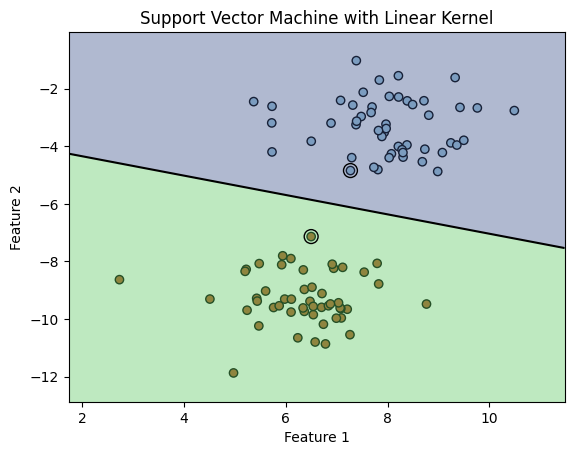

In [1]:


# Generate sample data for binary classification
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Create an SVM classifier with a linear kernel
# SVC: Support Vector Classifier
clf = svm.SVC(kernel='linear', C=1.0)

# Train the classifier
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Create a grid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundary
plt.contourf(xx, yy, Z > 0, alpha=0.4)
plt.contour(xx, yy, Z, colors=['k'], linestyles=['-'], levels=[0])

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k')

plt.title('Support Vector Machine with Linear Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Train a SVM model to detect IRIS Virginica flowers

Load Iris Dataset

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
iris['data'][:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Dataset for our task:

Only use two features, pedal length and pedal width, to build the SVM model.

Change labels for binary classification task: y = 1 if a sample is Iris virginica;
y = 0 for a sample which is not Iris Virginica.

In [ ]:
X = iris["data"][:,(2,3)] # pedal length, pedal width
y = (iris["target"] == 2).astype(np.int32) # 1 if Iris virginica, else 0

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

### Training and Fitting the model

In [ ]:
from sklearn.svm import SVC
model = SVC()
#model = SVC(kernel = 'linear', random_state = 0)

In [ ]:
model.fit(x_train, y_train)

SVC()

### Predictions from the trained model

In [ ]:
pred = model.predict(x_test)

### Model Evaluation

In [ ]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, pred))

[[31  0]
 [ 1 13]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45



# Further Readings

- SVM Tutorial (1h reading) https://www.kaggle.com/code/vuhunghn/svm-classifier-tutorial/
- Support Vector Machine  - Visually Explained (2min) https://www.youtube.com/watch?v=_YPScrckx28&ab_channel=VisuallyExplained
- Decision Trees & Random Forest - Visually Explained (9min) https://www.youtube.com/watch?v=LLBGiAAZqAM&ab_channel=VisuallyExplained


